In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [33]:
datasets = os.walk('./test_results').__next__()[1]

df = pd.DataFrame(columns=['dataset', 'exp_type', 'num_labeled', 'test_loss', 'test_acc', 'test_ece'])
for dataset in datasets:
    exp_types = os.walk('./test_results/' + dataset).__next__()[1]
    for exp_type in exp_types:
        metrics = pd.read_csv(f'./test_results/{dataset}/{exp_type}/test_metrics.csv')
        for num_labeled in metrics['num_labeled']:
            test_loss = metrics[metrics['num_labeled'] == num_labeled]['test_loss'].values[0]
            test_acc = metrics[metrics['num_labeled'] == num_labeled]['test_acc'].values[0]
            test_ece = metrics[metrics['num_labeled'] == num_labeled]['test_ece'].values[0]

            df.loc[len(df)] = {'dataset': dataset, 'exp_type': exp_type, 'num_labeled': num_labeled, 'test_loss': test_loss, 'test_acc': test_acc, 'test_ece': test_ece}

In [34]:
agg_df = pd.DataFrame(columns=['dataset', 'exp_type', 'min_ece', 'max_acc', 'final_ece', 'final_acc'])

for dataset in ['organsmnist']:
    exp_types = os.walk('./test_results/' + dataset).__next__()[1]
    for exp_type in ['active-softmax']:
        ece = df[(df['dataset'] == dataset) & (df['exp_type'] == exp_type)]['test_ece'].values
        acc = df[(df['dataset'] == dataset) & (df['exp_type'] == exp_type)]['test_acc'].values
        
        try:
            min_ece = np.min(ece)
            max_acc = np.max(acc)
            final_ece = ece[-1]
            final_acc = acc[-1]
            agg_df.loc[len(agg_df)] = {'dataset': dataset, 'exp_type': exp_type, 'min_ece': min_ece*100, 'max_acc': max_acc*100, 'final_ece': final_ece*100, 'final_acc': final_acc*100}
        except ValueError:
            continue                                

In [35]:
#remove ones with temp_scaled
df = df[~df['exp_type'].str.contains('temp_scaled')]

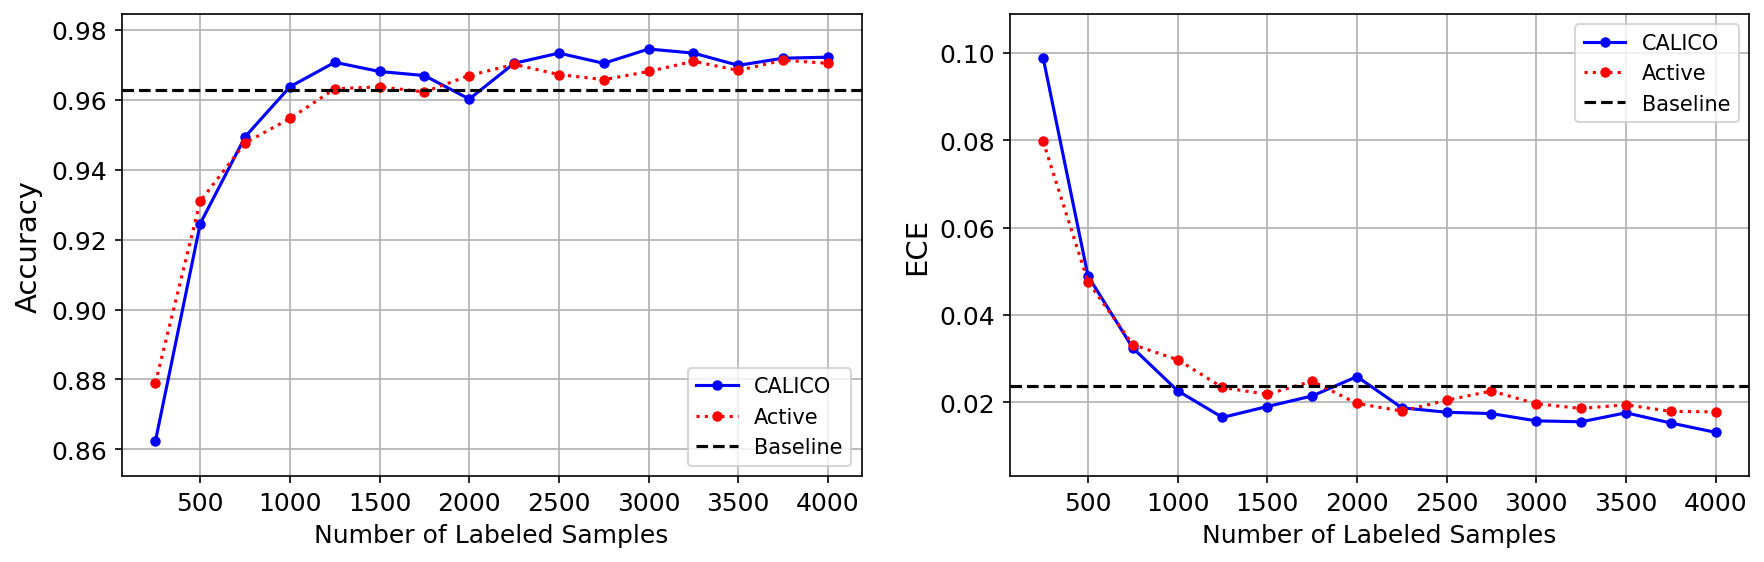

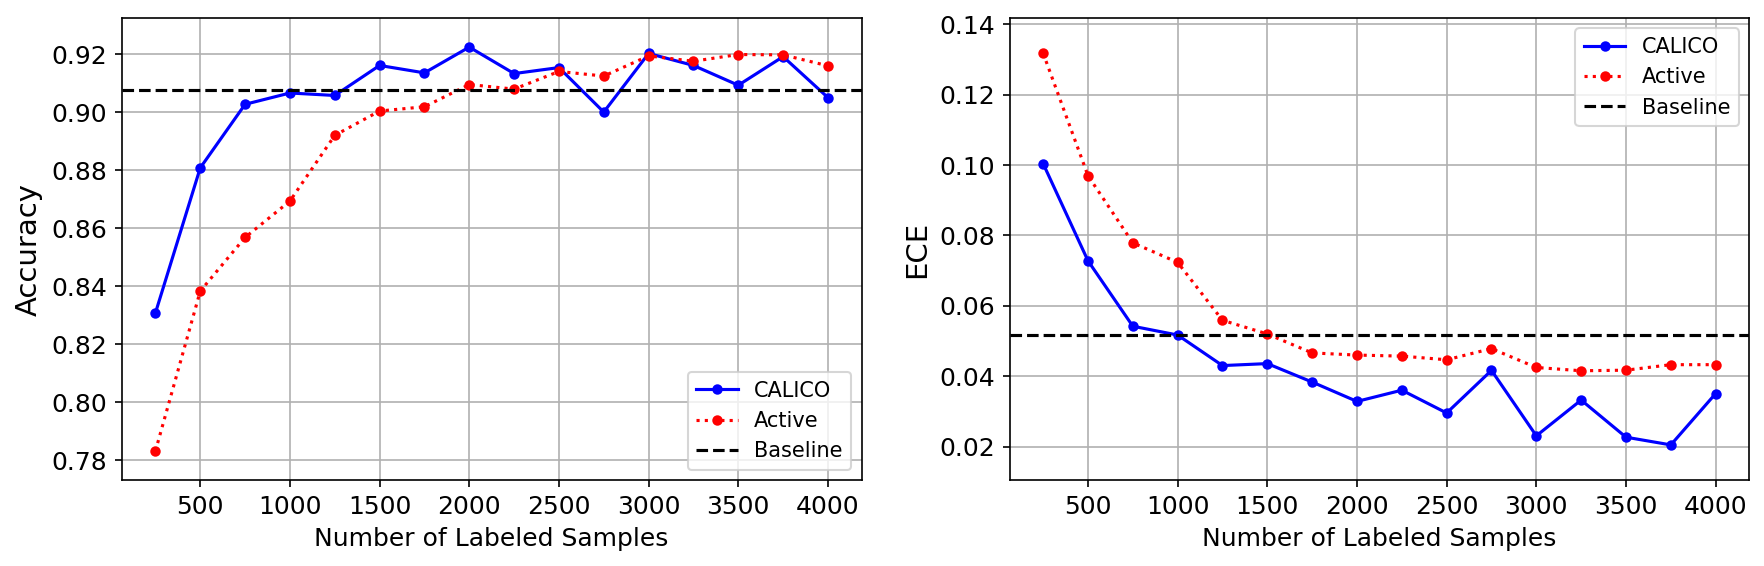

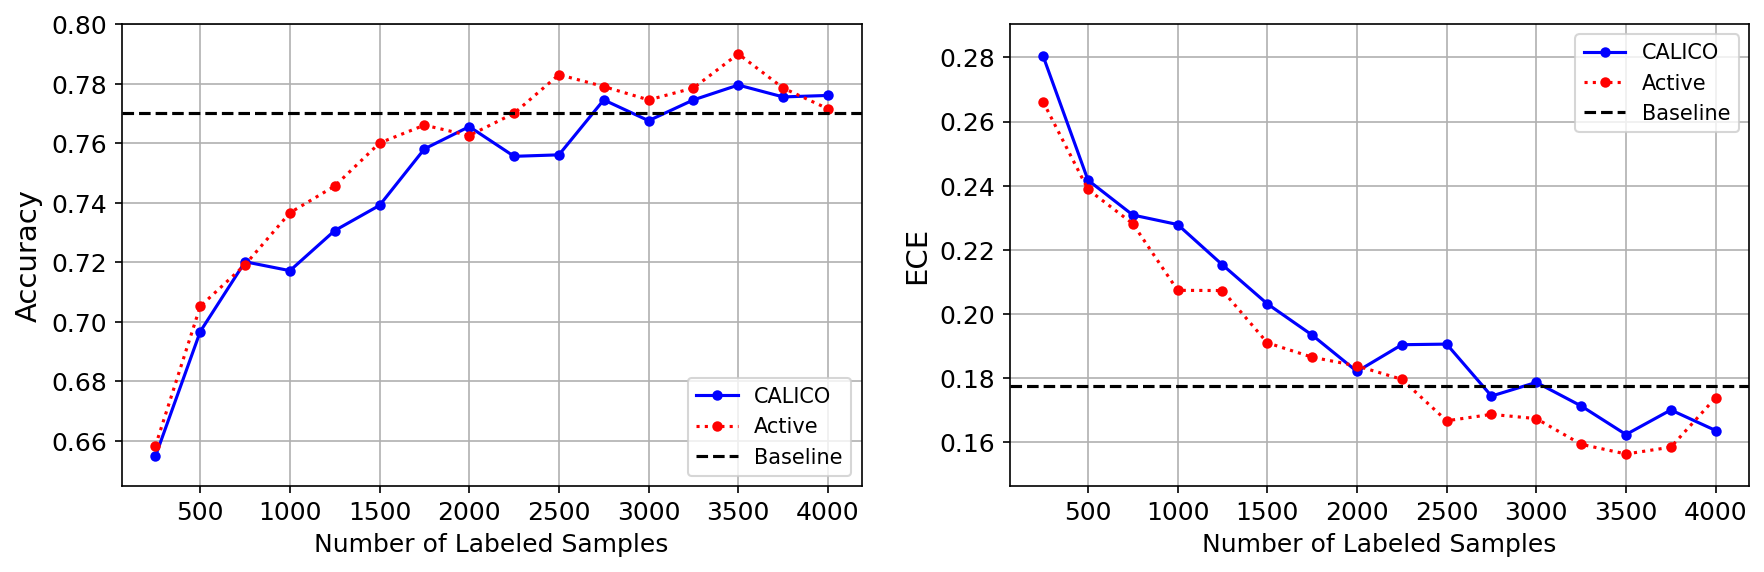

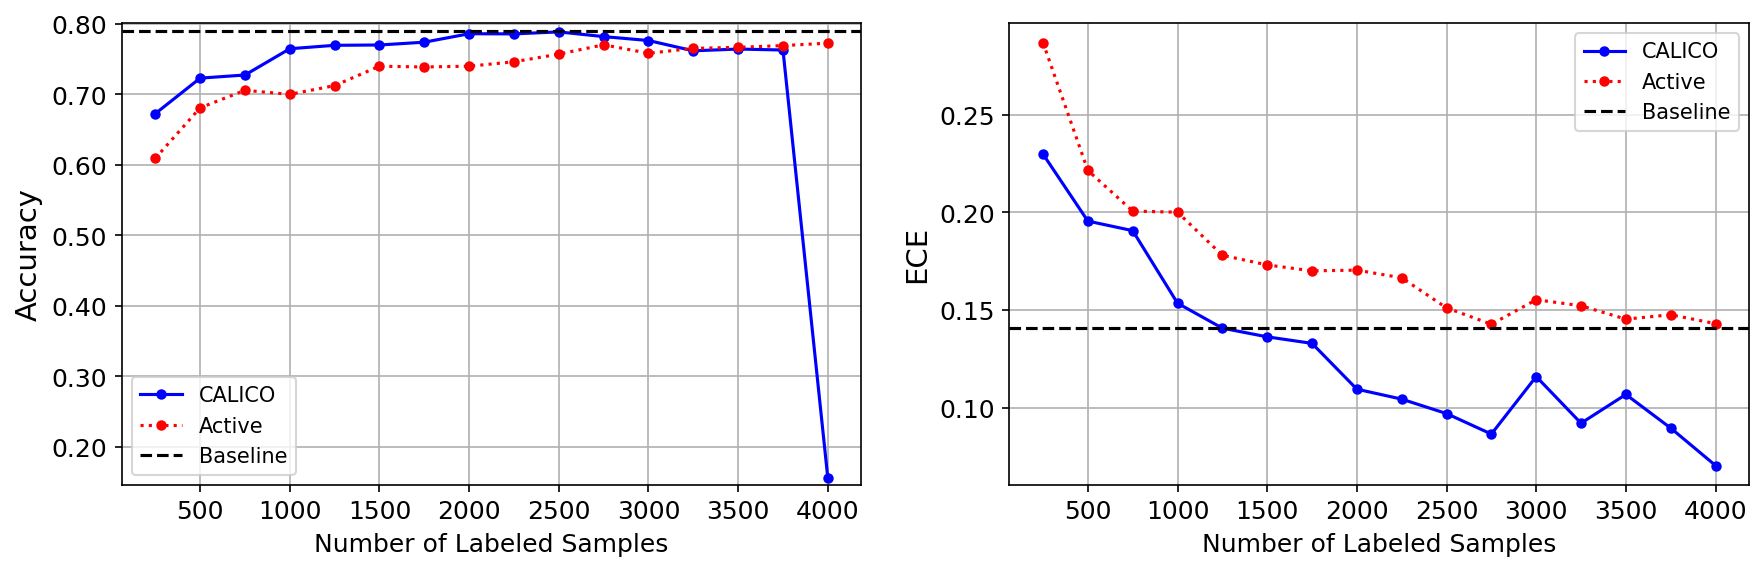

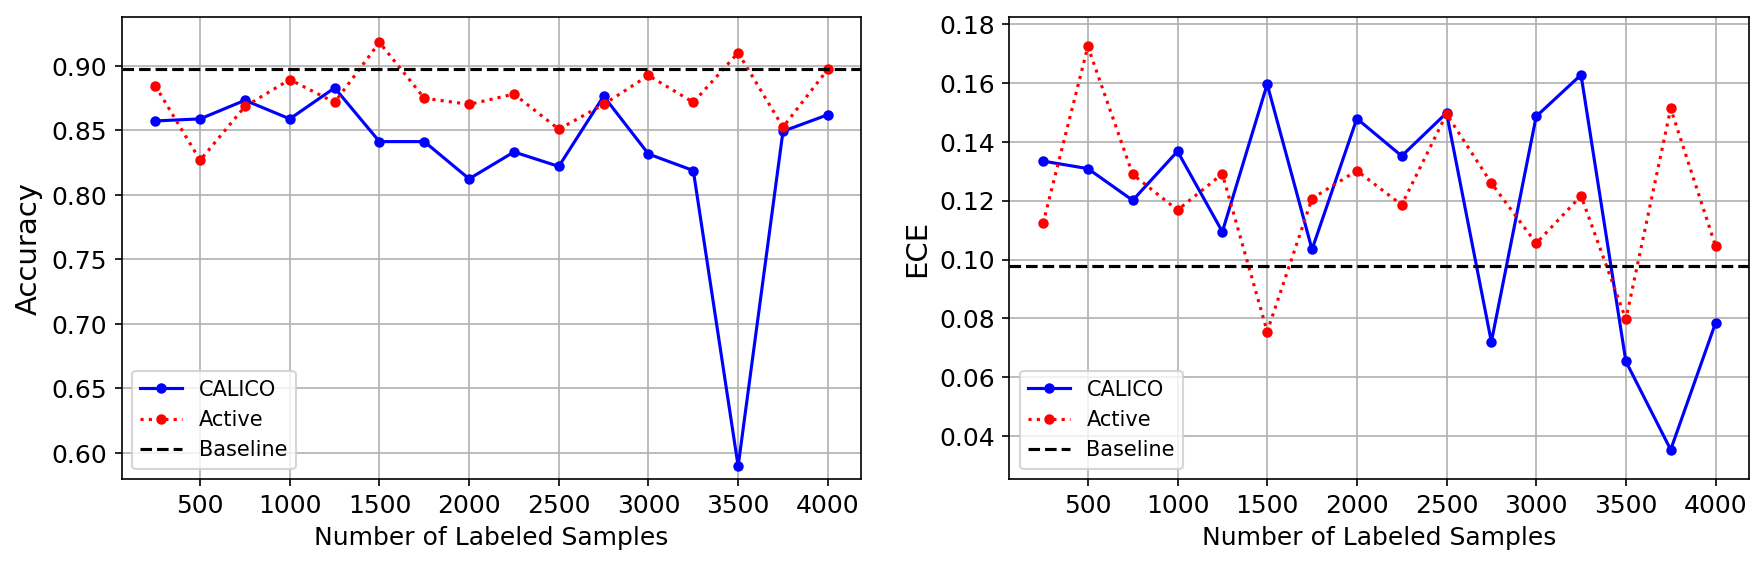

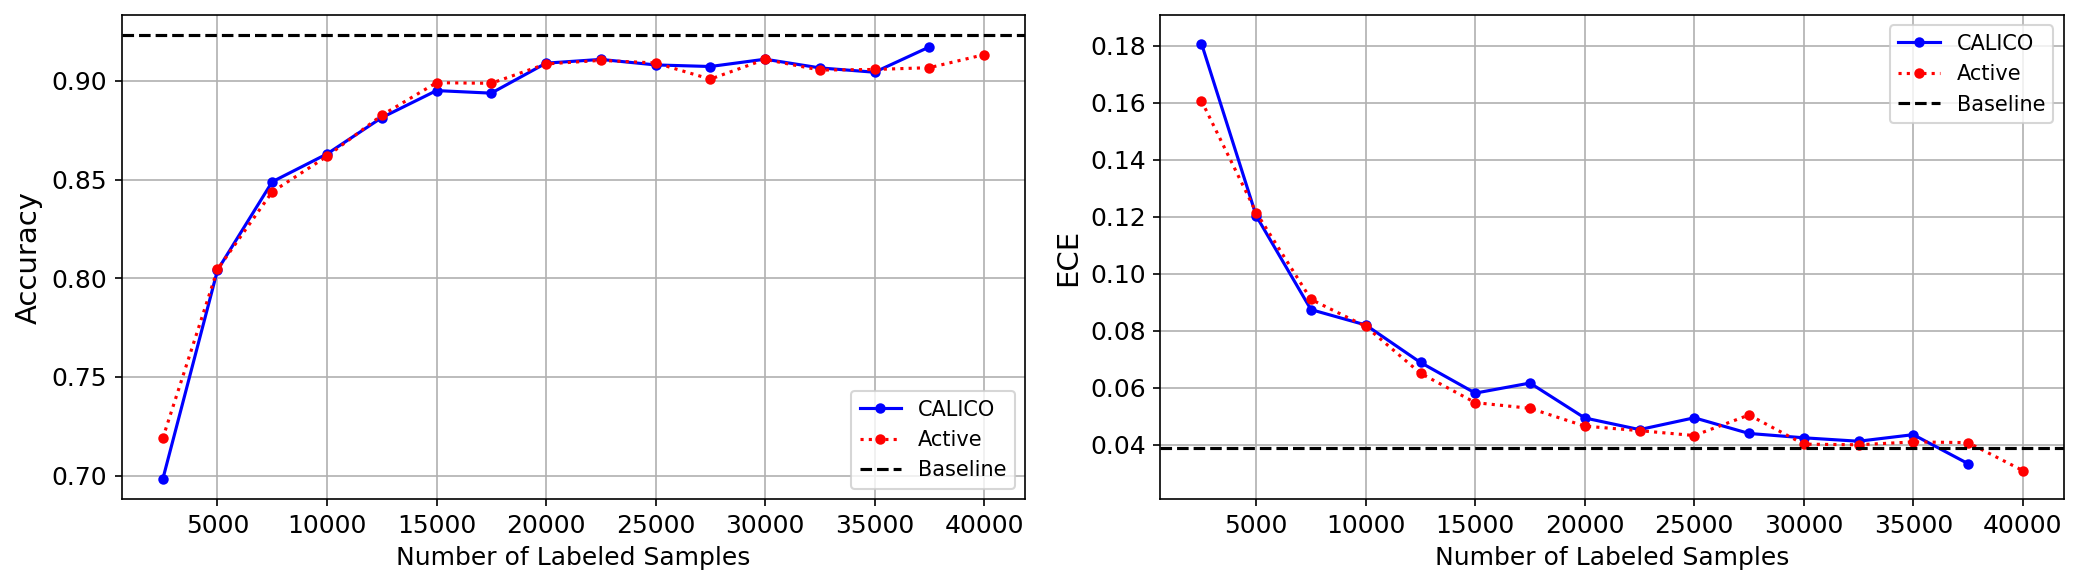

In [36]:
datasets = df['dataset'].unique()

# Iterate over the datasets
for i, dataset in enumerate(datasets):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), dpi=150)
    df_filtered = df[df['dataset'] == dataset]

    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

    ax1.yaxis.set_major_formatter(FuncFormatter('{:.2f}'.format))
    ax2.yaxis.set_major_formatter(FuncFormatter('{:.2f}'.format))
    
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Plot the accuracy on the first axes
    if "active-jempp" in df_filtered['exp_type'].unique():
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-jempp"]
        ax1.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_acc'],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )
        ax2.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_ece'],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )
    
    if "v_1" in df_filtered['exp_type'].unique():
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "v_1"]
        ax1.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_acc'],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )
        ax2.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_ece'],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered['exp_type'].unique():
        df_experiment_active_jempp = df_filtered[df_filtered['exp_type'] == "active-softmax"]
        ax1.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_acc'],  # replace with the correct column name for accuracy
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )
        ax2.plot(
            df_experiment_active_jempp['num_labeled'],
            df_experiment_active_jempp['test_ece'],  # replace with the correct column name for accuracy
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    if "baseline-softmax" in df_filtered['exp_type'].unique():
        df_baseline = df_filtered[df_filtered['exp_type'] == "baseline-softmax"]
        ax1.axhline(
            df_baseline['test_acc'].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )
        ax2.axhline(
            df_baseline['test_ece'].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

    # if 'active-softmax-temp_scaled' in df_filtered['exp_type'].unique():
    #     df_temp_scaled = df_filtered[df_filtered['exp_type'] == "active-softmax-temp_scaled"]
    #     ax1.plot(
    #         df_temp_scaled['num_labeled'],
    #         df_temp_scaled['test_acc'],
    #         color="green",
    #         marker="o",
    #         markersize=4,
    #         label="Temperature Scaling",
    #     )
    #     ax2.plot(
    #         df_temp_scaled['num_labeled'],
    #         df_temp_scaled['test_ece'],
    #         color="green",
    #         marker="o",
    #         markersize=4,
    #         label="Temperature Scaling",
    #     )

    ax1.set_ylabel("Accuracy", fontsize=14)

    # Set min and max y limits (0.2 above and below the min and max values), if min goes below 0, set to 0
    min_y = df_filtered["test_ece"].min() - 0.01
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_ece"].max() + 0.01
    ax2.set_ylim([min_y, max_y])

    min_y = df_filtered["test_acc"].min() - 0.01
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_acc"].max() + 0.01
    ax1.set_ylim([min_y, max_y])
    

    # Set the title, labels, and legend
    ax2.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax2.set_ylabel("ECE", fontsize=14)
    ax2.tick_params(axis="both", which="major", labelsize=12)
    ax2.legend(loc="best")
    ax2.grid()
    
    ax1.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=14)
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax1.legend(loc="best")
    ax1.grid()

plt.tight_layout()
plt.show()